In [1]:
# import required libraries
import pandas as pd
import re

In [2]:
df = pd.read_csv("preprocessed_data.csv")

In [4]:
pip install azure-ai-textanalytics

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load helper files
import http.client, urllib.request, urllib.parse, urllib.error, base64
import pandas as pd
import string
import json
import pprint
import hashlib
from colorama import Fore, Back, Style

In [4]:
key = "**************************" # 
endpoint = "https://cognitiveservice.cognitiveservices.azure.com/" 

In [5]:
# Set the keys and region where the cognitive services are accessed
subscription_key = key # 
cognitive_services_region = endpoint

# Set the request headers and parameters
headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key':subscription_key
}
params = urllib.parse.urlencode({
  # Request parameters
  'showStats': 'false',
  'model-version': 'V1',
})

In [6]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()
print(client)

In [36]:
# df['combined_statement'] = df['benefits']+df['side_effects']+df['comments']

In [7]:
df.fillna("",inplace=True)

In [8]:
def sentiment(df,col):
    for i, rows in df.iterrows():
        test_data = []
        test_data.append(df.loc[i,col].encode("utf-8").decode("ascii", "ignore"))
        result = client.analyze_sentiment(test_data)
        docs = [doc for doc in result if not doc.is_error]
        for idx, doc in enumerate(docs):
            df.loc[i, col+'_overall_sentiment'] = doc.sentiment
            df.loc[i, col+' positive %'] = doc.confidence_scores['positive']
            df.loc[i, col+' neutral %'] = doc.confidence_scores['neutral']
            df.loc[i, col+' negative %'] = doc.confidence_scores['negative']
        

In [9]:
sentiment(df,'comments')

In [14]:
df.to_csv("sentiments_new.csv",index=False)

In [3]:
new_df = pd.read_csv("sentiment_key_phrases.csv")

In [4]:
total = len(new_df)
correct = len(new_df[new_df['rating_sentiment'] == new_df['combined_statement_overall_sentiment']])
print("Total number of records in the dataset: ",len(new_df))
print("Total number of correctly identified rows:",len(new_df[new_df['rating_sentiment'] == new_df['combined_statement_overall_sentiment']]))
print("Accuracy:",correct/total)

Total number of records in the dataset:  3672
Total number of correctly identified rows: 2481
Accuracy: 0.6756535947712419


In [42]:
col = 'benefits'
for i, rows in df.iterrows():
    test_data = []
    test_data.append(df.loc[i,col])
    #print(i)
    result = client.extract_key_phrases(test_data)
    for idx, doc in enumerate(result):
        if not doc.is_error:
            df.loc[i, col+'_key_phrases'] = ", ".join(doc.key_phrases)

In [43]:
col = 'side_effects'
for i, rows in df.iterrows():
    test_data = []
    test_data.append(df.loc[i,col])
    #print(i)
    result = client.extract_key_phrases(test_data)
    for idx, doc in enumerate(result):
        if not doc.is_error:
            df.loc[i, col+'_key_phrases'] = ", ".join(doc.key_phrases)

In [47]:
col = 'comments'
for i, rows in df.iterrows():
    test_data = []
    test_data.append(df.loc[i,col])
    #print(i)
    result = client.extract_key_phrases(test_data)
    for idx, doc in enumerate(result):
        if not doc.is_error:
            df.loc[i, col+'_key_phrases'] = ", ".join(doc.key_phrases)

In [101]:
df[['benefits_key_phrases','side_effects_key_phrases','comments_key_phrases']].head()

,benefits_key_phrases,side_effects_key_phrases,comments_key_phrases
0,"prevalent side effect, benefit, mood, apparent","uncomfortable inner restlessness, worst side e...","debilitating side effect, abilify 15mg, three ..."
1,"state bipolar hypomania, severe depression, ag...","adequate sleep, hangover effect, cognitive blu...","daily klonopin, two month, wa goal, several we..."
2,"unorganized person, appointment time, daily re...",side effect,"one pill, 1st thing, am"
3,"abilify, depression","judgement reasoning skill, memory loss, retail...","drug seroquel abilify, psychological therapy, ..."
4,"short time, drug","excedrin migraine headache, 4am, vomiting, 14 ...","treatment, klonopin, goal, 30 day"


In [50]:
df.to_csv("sentiment_key_phrases.csv",index=False)

In [51]:
new_df = pd.read_csv("extracted_data.csv")

In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Drug_Name          3672 non-null   object
 1   Patient_Review     3672 non-null   object
 2   Ratings            3672 non-null   int64 
 3   Condition          3669 non-null   object
 4   Dosage             3672 non-null   object
 5   Other_conditions   1824 non-null   object
 6   Other_drugs_taken  1821 non-null   object
 7   Benefits           3622 non-null   object
 8   Side_effects       3460 non-null   object
 9   Comments           3640 non-null   object
dtypes: int64(1), object(9)
memory usage: 287.0+ KB


In [54]:
new_df.describe()

,Ratings
count,3672.000000
mean,6.912854
std,2.958908
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000


In [55]:
new_df.describe(include=object)

,Drug_Name,Patient_Review,Condition,Dosage,Other_conditions,Other_drugs_taken,Benefits,Side_effects,Comments
count,3672,3672,3669,3672,1824,1821,3622,3460,3640
unique,250,3013,1585,3624,1168,1358,3592,3345,3618
top,lexapro,synthroid review by 39 year old female patient,depression,500 mg taken twice a day for the period of 7 ...,depression,synthroid,#NAME?,.,see above
freq,71,5,287,4,79,25,7,29,7


In [58]:
new_df.head()


250

In [59]:
new_df['Drug_Name'].nunique()

250

Top 10 most reviewed drug:


<AxesSubplot:>

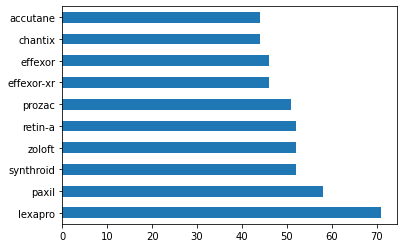

In [70]:
print("Top 10 most reviewed drug:")
new_df['Drug_Name'].value_counts()[:10].plot(kind='barh')

Top 10 least reviewed drug:


<AxesSubplot:>

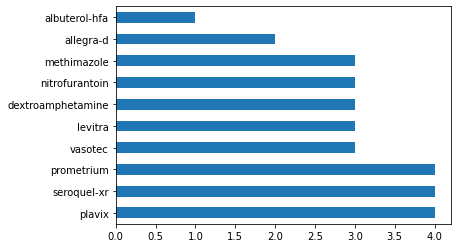

In [71]:
print("Top 10 least reviewed drug:")
new_df['Drug_Name'].value_counts()[-10:].plot(kind='barh')

In [93]:
drug_ratings = new_df.groupby(['Drug_Name'],as_index=False).mean().sort_values(by=['Ratings'],ignore_index=True)
top10_ratings = drug_ratings.tail(10)
bottom10_ratings = drug_ratings.head(10)

print("Top 10 average ratings:\n\n",top10_ratings.reset_index().drop('index',axis=1))
print("\n--------------------------------------")
print("--------------------------------------\n")
print("Bottom 10 average ratings:\n\n",bottom10_ratings.reset_index().drop('index',axis=1))

Top 10 average ratings:

         Drug_Name    Ratings
0       allegra-d   9.000000
1     vivelle-dot   9.090909
2         innofem   9.200000
3          cozaar   9.250000
4  armour-thyroid   9.266667
5          maxalt   9.400000
6         cytomel   9.500000
7     sumatriptan   9.500000
8         divigel   9.750000
9   albuterol-hfa  10.000000

--------------------------------------
--------------------------------------

Bottom 10 average ratings:

      Drug_Name   Ratings
0      omnicef  1.727273
1    risperdal  3.000000
2  clindamycin  3.125000
3    dexedrine  3.500000
4       flagyl  3.500000
5       avelox  3.500000
6     levaquin  3.750000
7     macrobid  3.909091
8      solodyn  4.000000
9      cleocin  4.250000


In [95]:
new_df.isnull().sum()

Drug_Name               0
Patient_Review          0
Ratings                 0
Condition               3
Dosage                  0
Other_conditions     1848
Other_drugs_taken    1851
Benefits               50
Side_effects          212
Comments               32
dtype: int64

In [97]:
new_df.fillna("").isnull().sum()

Drug_Name            0
Patient_Review       0
Ratings              0
Condition            0
Dosage               0
Other_conditions     0
Other_drugs_taken    0
Benefits             0
Side_effects         0
Comments             0
dtype: int64

In [105]:
# df[df["rating_sentiment"]!=df["combined_statement_overall_sentiment"]]
df[["rating_sentiment","combined_statement_overall_sentiment"]]

,rating_sentiment,combined_statement_overall_sentiment
0,negative,negative
1,positive,negative
2,positive,positive
3,negative,negative
4,negative,negative
...,...,...
3667,negative,negative
3668,positive,negative
3669,positive,positive
3670,neutral,positive


In [114]:
df["compare"] = df.apply(lambda x: True if x['rating_sentiment'] ==
                     x['combined_statement_overall_sentiment'] else False, axis=1)